In [10]:
# Imports necessary to run the notebook

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from ema_workbench import load_results
from ema_workbench.analysis import feature_scoring
from problem_formulation import get_model_for_problem_formulation



In [11]:
# Baseline results, from problum formularion load
results_data = load_results('sequential_results.tar.gz')
scenario_df, output_dict = results_data

In [12]:
# Retrieving model to access lever names
model_instance, _ = get_model_for_problem_formulation(1)

In [13]:
# Removing levers, they're set to 0 because of the base case, so we're able to remove them
input_data = scenario_df.drop(columns=[lever.name for lever in model_instance.levers])

In [14]:
# Get the feature scores
importance_scores = feature_scoring.get_feature_scores_all(input_data, output_dict)

In [17]:
# Because we use the base case, there are no investment costs. Therefore we can remove this categorie
importance_scores.drop(columns=['Total Investment Costs'], errors='ignore', inplace=True)

In [20]:
# Reshaping the data for better visualization of the outcomes
importance_long = (
    importance_scores
    .stack()
    .rename_axis(index=['Uncertainty', 'Outcome'])
    .reset_index(name='Importance')
)

# Plot

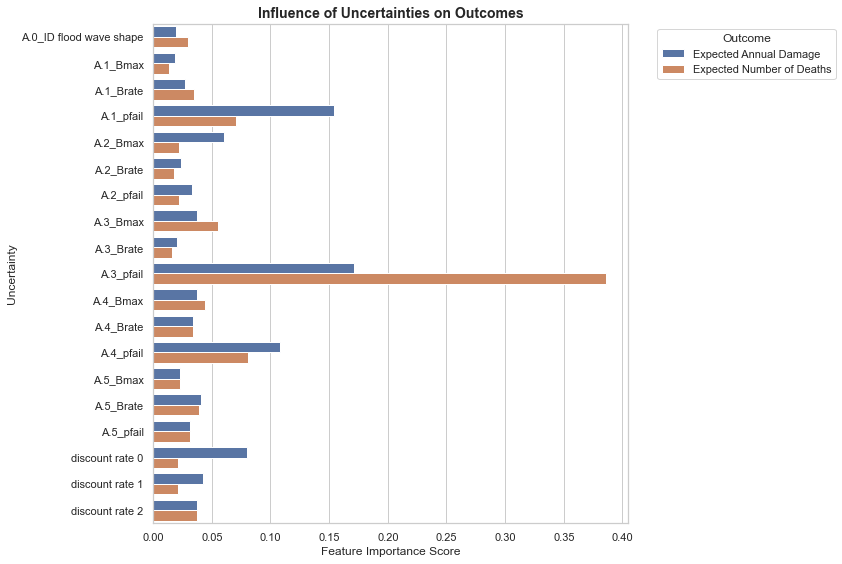

In [22]:
# Plotting the outcomes with bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(data=importance_long,
            y='Uncertainty',
            x='Importance',
            hue='Outcome',
            orient='h')

plt.title("Influence of Uncertainties on Outcomes", fontsize=14, fontweight='bold')
plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Uncertainty", fontsize=12)
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()